In [4]:
train_final = pd.read_csv('train_final.csv')
train_final = pd.get_dummies(train_final)
y = train_final.Credit_Rating
X = train_final.drop(columns = 'Credit_Rating')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

X = X_train[X_train.columns]
y = y_train

## Length of the report {-}
The length of the report must be no more than 15 pages, when printed as PDF. However, there is no requirement on the minimum number of pages.

You may put additional stuff as Appendix. You may refer to the Appendix in the main report to support your arguments. However, your appendix is unlikely to be checked while grading, unless the grader deems it necessary. The appendix and references will not be included in the page count, and there is no limit on the length of the appendix.

**Delete this section from the report, when using this template.** 

## Code should be put separately in the code template {-}
Your report should be in a research-paper like style. If there is something that can only be explained by showing the code, then you may put it, otherwise do not put the code in the report. We will check your code in the code template. 

However, feel free to write code that prints output and then hide the code using the *yaml* setting as shown in an example below *(in the EDA section)*

**Delete this section from the report, when using this template.** 

## Background / Motivation

As students, we aimed to gain practical experience by working on a dataset that had real-world applications and relevance. Credit score prediction is a vital task for financial institutions, and having a model that accurately predicts individual credit scores can contribute to informed lending decisions and risk assessment. In addition, we wanted a dataset we knew was large enough to explore and test different modeling techniques. By utilizing bagged MARS, decision tree, random forest, and XGBoost models within our ensemble approach, we aimed to leverage the unique strengths and capabilities of each model.

## Problem statement 

Credit scores are a crucial factor in determining an individual’s financial health, and lenders heavily rely on them to assess creditworthiness and risk. However, credit score calculations can be complex and multifaceted, taking into account a range of factors such as payment history, outstanding debts, credit utilization, and length of credit history. **Our goal is to build a reliable ensemble model using bagged MARS, decision tree, random forest, and XGboost models that can accurately predict individual credit scores based on multiple credit- and customer-related predictors using RMSE as our evaluation metric.** This model will provide lenders and other shareholders with a tool to make more informed decisions and help secure better financial outcomes.

## Data sources

Our data source is an open source dataset found on Kaggle. The data provides 100,000 observations, 18 continuous predictors as well as four categorical predictors that will be useful in our prediction of individual credit scores. The response is a column based off `Credit_Score` called `Credit_Rating`: the way this column is prepared is discussed in the "Data quality check / cleaning / preparation" section of this report.  Some of the predictors include `Credit_History_Age`, `new credit`, `Credit_Mix`, `Credit_Utilization_Ratio`, and `Num_of_Delayed_Payment`, amongst many others in need of assessment. The data set can be found [here](https://www.kaggle.com/datasets/parisrohan/credit-score-classification).

## Stakeholders

**Lenders**, such as banks or financial institutions, rely on credit scores to evaluate the creditworthiness of potential borrowers. Accurate credit score predictions enable lenders to make informed decisions about approving loans, setting interest rates, and managing credit risk. With a reliable prediction model, lenders can better assess the likelihood of repayment and adjust their lending practices accordingly, leading to more prudent lending decisions and reduced financial risk.

**Borrowers** can use a model like this to help understand their creditworthiness and potential loan eligibility. It allows them to plan their financial activities, negotiate favorable terms, and make informed decisions about borrowing and managing their credit. With accurate credit score predictions, borrowers can access better loan opportunities, secure lower interest rates, and improve their overall financial well-being.

**Credit bureaus** play a critical role in the credit industry by collecting and maintaining credit data. A model that accurately predicts credit scores benefits credit bureaus by enhancing their ability to provide more precise and reliable credit reports. By incorporating multiple predictors, the model can capture a comprehensive view of a borrower's creditworthiness, leading to more accurate credit assessments and credit reporting services. This, in turn, improves the quality and reliability of credit information provided by credit bureaus to lenders and borrowers.

**Regulators** like government agencies have an interest in ensuring fair lending practices and maintaining the stability of the financial system. Accurate credit score predictions based on multiple predictors support regulators in monitoring and assessing the credit industry. They can use such models to identify potential systemic risks, detect discriminatory lending practices, and enforce regulations aimed at protecting consumers' rights. The model's success can lead to a more transparent and equitable lending environment, promoting financial stability and consumer protection.

## Data quality check / cleaning / preparation 


The first step taken in the data preparation was creating the new response column, `Credit_Rating`. The credit scores in the dataset are classified into "Poor", "Standard", and "Good". Each of the three categories were assigned random credit ratings to those with Poor credit scores (ratings from 0-579), those with Standard (ratings from 580-668), and Good (ratings from 670-729) in order to pursue a continuous response and model with regression. These credit ratings were determined using FICO score ratings found on [Investoperdia](https://www.investopedia.com/terms/f/ficoscore.asp). Once the response was created, a new training dataset was created to use for the rest of the analysis.

This dataset was very dirty. There were hundreds of instances where observations were surrounded by underscores and spaces that made it difficult to begin the EDA. These invalid characters were removed from the columns, in addition to setting all numerical columns to the integer datatype. There were thousands of columns that were identified as outliers and errors, in addition to missing values. Before removing NAN values and outliers, the RMSE of the base model was found to be 209.9847067897364; however, upon removing these outliers and missing values, the number of observations reduced to 8304.

Finally, dummy columns were made for the two categorical predictors `Credit_Mix` and `Payment_of_Min_Amount` using pd.get_dummies, and the dataset was split using test_size = 0.2 and random_state = 45

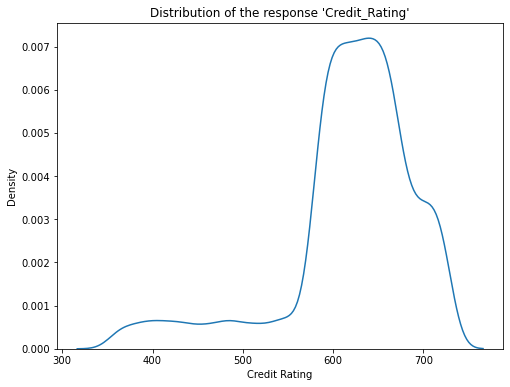

Statistical Summary of Response "Credit_Rating":


count    8034.000000
mean      618.481320
std        75.088475
min       353.837009
25%       594.377473
50%       630.049322
75%       664.552099
max       728.753781
Name: Credit_Rating, dtype: float64

In [20]:
#|echo: false
fig, ax = plt.subplots(figsize=(8, 6))

sns.kdeplot(train_final['Credit_Rating'], ax=ax)

ax.set_title("Distribution of the response 'Credit_Rating'")
ax.set_xlabel('Credit Rating')
ax.set_ylabel('Density')
plt.show()

print('Statistical Summary of Response "Credit_Rating":')
train_final['Credit_Rating'].describe().T

In [21]:
#|echo: false
distribution_stats = train_final.describe().drop(['Unnamed: 0','Credit_Rating','Credit_Mix_Bad','Credit_Mix_Good','Credit_Mix_Standard',
                                                 'Payment_of_Min_Amount_No','Payment_of_Min_Amount_Yes'],axis=1)
print('Continuous Predictor Distribution Table:')
distribution_stats.T

Continuous Predictor Distribution Table:


,count,mean,std,min,25%,50%,75%,max
Age,8034.0,29.221309,53.129903,-500.000000,24.000000,33.000000,43.000000,711.000000
Annual_Income,8034.0,39756.415694,25094.001345,8459.020000,20701.211250,34107.420000,56408.135000,781808.000000
Monthly_Inhand_Salary,8034.0,3282.670144,1752.824797,989.594583,1747.830833,2845.254167,4663.861875,7309.870000
Num_Bank_Accounts,8034.0,5.016928,2.909389,-1.000000,3.000000,5.000000,7.000000,105.000000
Num_Credit_Card,8034.0,5.357605,5.265296,1.000000,4.000000,5.000000,7.000000,147.000000
Num_of_Loan,8034.0,2.927931,2.157650,0.000000,1.000000,3.000000,4.000000,49.000000
Num_of_Delayed_Payment,8034.0,12.411501,6.087740,-3.000000,9.000000,12.000000,17.000000,195.000000
Changed_Credit_Limit,8034.0,9.794203,3.569070,3.630000,7.120000,9.480000,12.137500,17.190000
Num_Credit_Inquiries,8034.0,5.132686,4.858646,0.000000,2.000000,4.000000,7.000000,208.000000
Outstanding_Debt,8034.0,1110.336964,567.402124,268.830000,656.020000,1053.720000,1406.010000,2576.960000


In [18]:
#|echo: false
cat_var = ['Credit_Mix_Bad','Credit_Mix_Good','Credit_Mix_Standard',
                            'Payment_of_Min_Amount_No','Payment_of_Min_Amount_Yes']

distribution_table = pd.DataFrame(columns=['Variable', 'Category', 'Frequency'])

for var in cat_var:
    distribution_stats = train_final[var].value_counts(dropna=False)
    missing_values = train_final[var].isnull().sum()
    temp_df = pd.DataFrame({
        'Variable': var,
        'Category': distribution_stats.index,
        'Frequency': distribution_stats.values,
    })

    distribution_table = distribution_table.append(temp_df, ignore_index=True)

print("Categorical Predictor Distribution Table:")
distribution_table

Categorical Predictor Distribution Table:


,Variable,Category,Frequency
0,Credit_Mix_Bad,0,7346
1,Credit_Mix_Bad,1,688
2,Credit_Mix_Good,0,5555
3,Credit_Mix_Good,1,2479
4,Credit_Mix_Standard,1,4867
5,Credit_Mix_Standard,0,3167
6,Payment_of_Min_Amount_No,0,4519
7,Payment_of_Min_Amount_No,1,3515
8,Payment_of_Min_Amount_Yes,1,4519
9,Payment_of_Min_Amount_Yes,0,3515


## Exploratory data analysis

If there is any EDA that helped with model development, put it here. If EDA didn't help then mention that, and you may show your EDA effort *(if any)* in the appendix.

List the insights (as bullet points), if any, you got from EDA  that ended up being useful towards developing your final model. 

If there are too many plots / tables, you may put them into appendix, and just mention the insights you got from them.

Note that you can write code to publish the results of the code, but hide the code using the yaml setting `#|echo: false`. For example, the code below makes a plot, but the code itself is not published with Quarto in the report.

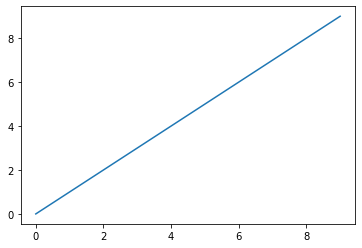

In [4]:
#| echo: false
import matplotlib.pyplot as plt
plt.plot(range(10));

## Approach

What kind of a models did you use? What performance metric(s) did you optimize and why?

Is there anything unorthodox / new in your approach? 

What problems did you anticipate? What problems did you encounter? 

Did your problem already have solution(s) (posted on Kaggle or elsewhere). If yes, then how did you build upon those solutions, what did you do differently? Is your model better as compared to those solutions in terms of prediction accuracy or your chosen metric?

**Important: Mention any code repositories (with citations) or other sources that you used, and specifically what changes you made to them for your project.**

## Developing the model: Hyperparameter tuning

Every person must describe their hyperparameter tuning procedure. Show the grid of hyperparameter values over which the initial search was done *(you may paste your grid search / random search / any other search code)*, and the optimal hyperparameter values obtained. After getting the initial search results, how did you make decisions *(if any)* to further fine-tune your model. Did you do another grid / random search or did you tune hyperparameters sequentially? If you think you didn't need any fine tuning after the initial results, then mention that and explain why.

Put each model in a section of its name and mention the name of the team-member tuning the model. Below is an example:

### MARS and Bagged MARS
*By Luca Moretti*

The first steps in creating the MARS model was to run through a 5-fold cross validation to find the optimal degrees for the model. Using maximum_term=1000 and a degree range from 1 to 10, the results yielded an optimum degree of 2 with a test RMSE of 64.582452. Further investigation of the model showed 19 degrees of freedom, excluding the intercept. Below is the final MARS model:

*MARS = Earth(max_terms=1000, max_degree=2, feature_importance_type= 'rss')*
# 
This model is able to be improved by using MARS as the base estimator in a bagging model. The following hyperparameters were investigated:

*'n_estimators'*: determines the number of decision trees that will be created in the ensemble. 

*'max_samples'*: controls the number or proportion of samples from the training data that will be randomly selected for each tree.

*'max_features'*: determines the number or proportion of features to consider when looking for the best split during the construction of each tree.
# 
Searching through the following grid search yielded a test RMSE greater than that of the initial MARS model of 65.18251923571461:

       {'n_estimators': [200, 300, 400],
        'max_samples': [1.0, 1.5],
        'max_features': [0.25, 0.5, 0.75]}

The model needs finer tuning after these initial results. Upon further investigation and testing of parameters using a few random searches, the following grid search yielded the best test RMSE of 61.90342908024614 using a 'max_features' of 0.5, a 'max_samples' of 1.0, and an 'n_estimators' of 200:

        {'n_estimators': [100,150,200],
         'max_samples': [0.5,1.0],
         'max_features': [0.5,1.0],}

Below is the final model used in the ensemble model:

*model1 = BaggingRegressor(base_estimator=MARS, n_estimators=250, random_state=1,
                        oob_score=True,n_jobs=-1,bootstrap_features=True,bootstrap=True,
                        max_features=1.0,max_samples=1.0)*

### Bagged Trees
*By Nicket Mauskar*

In my Bagged trees models, the first thing I did was graph the OOB R-squared and R-squred on the train data vs the number of trees, which basically narrowed down my n_estimators to around 150-250. This is where I started in my grid search. The paramaters of my first grid search and the results are below: 
Paramaters of Coarse Grid:  
        
        {'n_estimators': [150,200,250],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}
          
 
Optimal parameters of Coarse Grid: 

        {'bootstrap': True, 
        'bootstrap_features': False, 
        'max_features': 0.5, 
        'max_samples': 1.0, 
        'n_estimators': 250}
 
Test RMS Grid Search: 62.63951642827617


From these results, I decided to increase the range of n_estimators from 150-250 to 250-350, the range of the max_features from [.5, 1] to [.4, .5, .6], and I kept bootstrap and boostrap_features the same to encompass both True and False values. 


Finer Grid Search 1: 
Parameters of Finer Grid 1: 

         {'n_estimators': [250, 300, 350],
          'max_samples': [1.0],
          'max_features': [0.4, 0.5, 0.6],
          'bootstrap': [True],
          'bootstrap_features': [True, False]}
 
Optimal paramters of Finer Grid 1: 


        {'bootstrap': True, 
        'bootstrap_features': True, 
        'max_features': 0.6,
        'max_samples': 1.0, 
        'n_estimators': 350}
Test RMSE Finer Grid 1: 62.3023511506021

From this finer grid search, I was able to decrease the Test RMSE by .3. Thus, for my second finer grid serch I increased the range of n_estimators to [350, 500], and kept the max_features the same. This finer grid search yielded a test RMSE of 62.363417489451514, which was basically an increase so I realized I was going in the wrong direction. For my third and final grid search, I decided to use the max_features of [0.5, 1], and increase the range of n_estimators to [250, 400] to make sure I was not overlooking any better combination. The third finer grid search is below:

Finer Grid Search 3: 
Parameters of Finer Grid 3: 

        {'n_estimators': [250, 300, 400],
          'max_samples': [1.0],
          'max_features': [0.4, 0.5, 0.6, 1.0],
          'bootstrap': [True],
          'bootstrap_features': [True, False]}

Optimal parameters of Finer Grid 3: 

        {'bootstrap': True, 
        'bootstrap_features': False, 
        'max_features': 0.5,
        'max_samples': 1.0, 
        'n_estimators': 400}
        
This got my final test RMSE to 62.27130373550364, which is the lowest RMSE of the 4 total grid searches. 

### Random forest
*By Kaylee Mo*

### XGBoost
*By Ashley Witarsa*

## Model Ensemble 

Put the results of enembling individual models. Feel free to add subsections in this section to add more innovative ensembling methods.

### Voting ensemble

The simplest voting ensemble will be the model where all models have equal weights.

You may come up with innovative methods of estimating weights of the individual models, such as based on their cross-val error. Sometimes, these methods may work better than stacking ensembles, as stacking ensembles tend to overfit.

### Stacking ensemble
Try out different models as the metamodel. You may split work as follows. The person who worked on certain types of models *(say AdaBoost and MARS)* also uses those models as a metamodel in the stacking ensemble.

### Ensemble of ensembled models

If you are creating multiple stacking ensembles *(based on different metamodels)*, you may ensemble them.

## Limitations of the model with regard to prediction

Are you confident that you found the optimal hyperparameter values for each of your individual models, and that your individual models cannot be better tuned? Or, are there any models that could be better tuned if you had more time / resources, but you are limited by the amount of time you can spend on the course project *(equivalent to one assignment)*? If yes, then which models could be better tuned and how?

Will it be possible / convenient / expensive for the stakeholders to collect the data relating to the predictors in the model. Using your model, how soon will the stakeholder be able to predict the outcome before the outcome occurs. For example, if the model predicts the number of bikes people will rent in Evanston on a certain day, then how many days before that day will your model be able to make the prediction. This will depend on how soon the data that your model uses becomes available. If you are predicting election results, how many days / weeks / months / years before the election can you predict the results. 

When will your model become too obsolete to be useful?

## Other sections *(optional)*

You are welcome to introduce additional sections or subsections, if required, to address any specific aspects of your project in detail. For example, you may briefly discuss potential future work that the research community could focus on to make further progress in the direction of your project's topic.

## Conclusions and Recommendations to stakeholder(s)

What conclusions do you draw based on your model? You may draw conclusions based on prediction accuracy, or other performance metrics.

How do you use those conclusions to come up with meaningful recommendations for stakeholders? The recommendations must be action-items for stakeholders that they can directly implement without any further analysis. Be as precise as possible. The stakeholder(s) are depending on you to come up with practically implementable recommendations, instead of having to think for themselves.

If your recommendations are not practically implementable by stakeholders, how will they help them? Is there some additional data / analysis / domain expertise you need to do to make the recommendations implementable? 

Do the stakeholder(s) need to be aware about some limitations of your model? Is your model only good for one-time use, or is it possible to update your model at a certain frequency (based on recent data) to keep using it in the future? If it can be used in the future, then for how far into the future?

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 25%;">
       <col span="1" style="width: 40%;">
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Individual Model</th>
    <th>Work other than individual model</th>    
    <th>Details of work other than individual model</th>
  </tr>
  <tr>
    <td>Luca Moretti</td>
    <td>MARS & Bagged MARS</td>
    <td>Data cleaning & Variable selection</td>    
    <td>Created new response variable and removed invalid characters from columns</td>
  </tr>
  <tr>
    <td>Nicket Mauskar</td>
    <td>Bagged Trees</td>
    <td>Ensembling</td>    
    <td>Stacking ensembles and voting ensemble</td>
  </tr>
    <tr>
    <td>Kaylee Mo</td>
    <td>Random forest</td>
    <td>Ensembling</td>    
    <td>Variable selection based on feature importance</td>
  </tr>
    <tr>
    <td>Ashley Witarsa</td>
    <td>XGBoost</td>
    <td>Ensembling</td>    
    <td>Innovative ensemble & stacking ensemble</td> 
  </tr>
</table>

## References {-}

List and number all bibliographical references. When referenced in the text, enclose the citation number in square brackets, for example [1].

[1] Authors. The frobnicatable foo filter, 2014. Face and Gesture submission ID 324. Supplied as additional material
fg324.pdf. 3


## Appendix {-}

You may put additional stuff here as Appendix. You may refer to the Appendix in the main report to support your arguments. However, the appendix section is unlikely to be checked while grading, unless the grader deems it necessary.